In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pylaxz

In [2]:
img_path = './predicted.jpg'

In [4]:
img = cv2.imread(img_path)

shape => h  , w ,  c
gray => (384, 832) 
orig => (384, 832, 3)


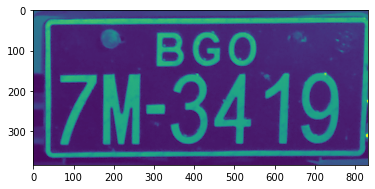

In [16]:
# change to gray space
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

print("shape => h  , w ,  c")
print('gray =>' , str(gray_img.shape), '\norig =>' , str(img.shape))

In [17]:
methods = [
	("THRESH_BINARY", cv2.THRESH_BINARY),
	("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
	("THRESH_TRUNC", cv2.THRESH_TRUNC),
	("THRESH_TOZERO", cv2.THRESH_TOZERO),
	("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV),
    ("THRESH_OTSU", cv2.THRESH_OTSU)]

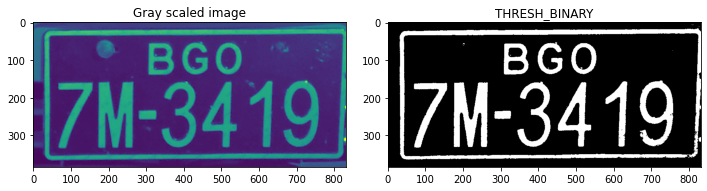

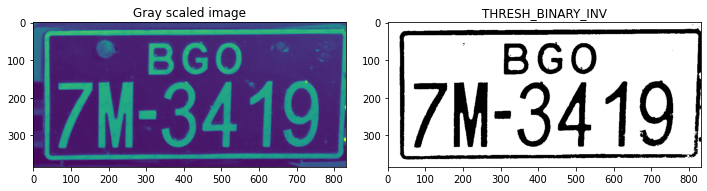

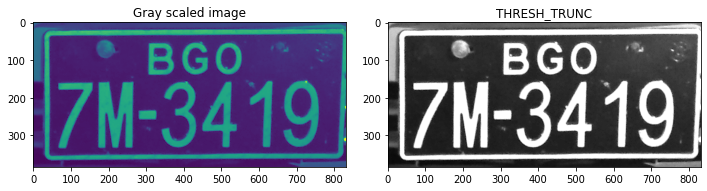

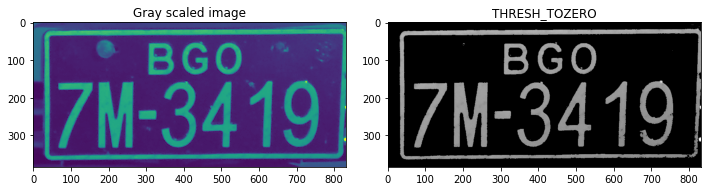

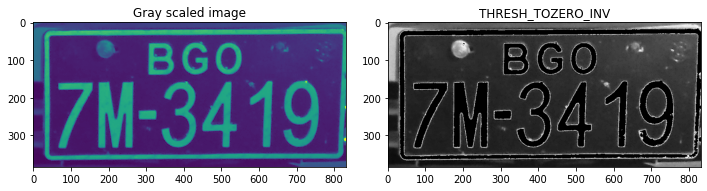

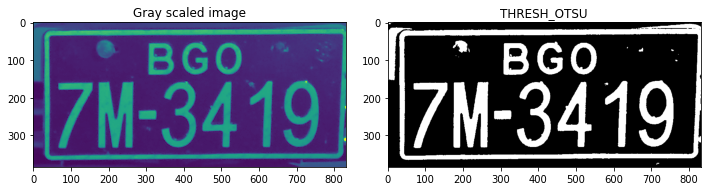

In [20]:
threshold = 127
for (threshName, threshMethod) in methods: #threshMethod is just 0 to 8 or smth
    (T, thresh_image) = cv2.threshold(src=gray_img, thresh=threshold, maxval=255, type=threshMethod)
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 7.5))
    fig.tight_layout()
    axes[0].imshow(gray_img)
    axes[0].set_title('Gray scaled image')

    axes[1].imshow(thresh_image, cmap='gray')
    axes[1].set_title(threshName)
#If a pixel in the input image passes the threshold test, it will have the value set to 255. (THRESH_BINARY)
#leaves the pixel intensities as they are if the source pixel is not greater than the supplied threshold. (THRESH_TRUNC)
#cv2.THRESH_TOZERO  which sets the source pixel to zero if the source pixel is not greater than the supplied threshold

## Blur and Thresh

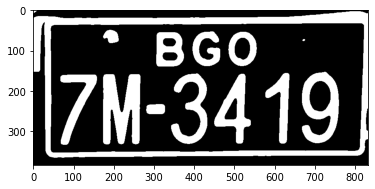

In [40]:
blur_gray = cv2.GaussianBlur(src=gray_img, ksize=(21,21), sigmaX=0)
T,processed_img  = cv2.threshold(src=blur_gray,thresh=127, maxval=255, type=cv2.THRESH_OTSU)
plt.imshow(processed_img, cmap='gray')

## Horizontal Projection

In [41]:
projs = np.sum(processed_img, 1)

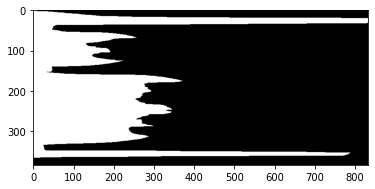

In [49]:
# Create output image same height as text
m = np.max(projs)
h, w = processed_img.shape[:2]
result = np.zeros((h,w))
# Draw a line for each row
for row in range(h):
    cv2.line(result, (0,row), (int(projs[row]*w/m),row), (255,255,255), 1)

plt.imshow(result, cmap='gray')

In [75]:
def first_s_e_points(length_proj, ratio=5):
    e = (length_proj/ratio) + length_proj / 10
    return (0, int(e))

In [76]:
def s_e_points(length_proj, ratio=5):
    s = length_proj/ratio
    e = (length_proj * (2 / ratio)) + (s / 10)
    return (int(s), int(e))

In [78]:
fs, fe = first_s_e_points(len(projs), ratio=5)
s, e  = s_e_points(len(projs), ratio=5)

f_min_pt = min(projs[fs:fe])
min_pt = min(projs[s:e])

f_ref_pt = np.where(projs == f_min_pt)
ref_pt = np.where(projs == min_pt)

In [79]:
print(f_ref_pt)
print(ref_pt)

(array([2]),)
(array([153]),)


In [88]:
if len(ref_pt) < 5 :
    # narrow bandwidh
    ref_pt = list(range(ref_pt[0][0]-5 , ref_pt[0][0] + 5 ))
    
if len(f_ref_pt) < 5:
    f_ref_pt = list(range(f_ref_pt[0][0]-5 ,f_ref_pt[0][0] + 5 ))

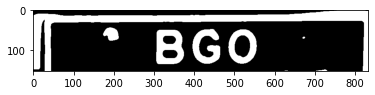

In [93]:
plt.imshow(processed_img[f_ref_pt[-1]:ref_pt[-1]], cmap='gray')

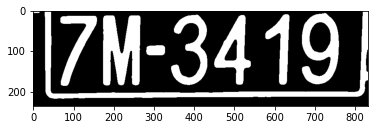

In [97]:
plt.imshow(processed_img[ref_pt[0]:], cmap='gray')

# Final Implementation

In [108]:
def check_proj (processed_img , projs):
    # Create output image same height as text
    m = np.max(projs)
    h, w = processed_img.shape[:2]
    result = np.zeros((h,w))
    # Draw a line for each row
    for row in range(h):
        cv2.line(result, (0,row), (int(projs[row]*w/m),row), (255,255,255), 1)

    plt.imshow(result, cmap='gray')

In [107]:
def first_s_e_points(length_proj, ratio=5):
    e = (length_proj/ratio) + length_proj / 10
    return (0, int(e))

def s_e_points(length_proj, ratio=5):
    s = length_proj/ratio
    e = (length_proj * (2 / ratio)) + (s / 10)
    return (int(s), int(e))

In [109]:
def post_process(lp, ratio=5):
    # rgb to gray
    gray_img = cv2.cvtColor(lp, cv2.COLOR_RGB2GRAY)
    # remove noise (apply blur -> kernel = 21,21)
    blur_gray = cv2.GaussianBlur(src=gray_img, ksize=(21,21), sigmaX=0)
    # apply threshold to blur-gray
    T,processed_img  = cv2.threshold(src=blur_gray,thresh=127, maxval=255, type=cv2.THRESH_OTSU)
    # check
    # plt.imshow(processed_img, cmap='gray')
    
    projs = np.sum(processed_img, 1)
    
    # check_proj (processed_img, projs)
    
    fs, fe = first_s_e_points(len(projs), ratio=5)
    s, e  = s_e_points(len(projs), ratio=5)

    f_min_pt = min(projs[fs:fe])
    min_pt = min(projs[s:e])

    f_ref_pt = np.where(projs == f_min_pt)
    ref_pt = np.where(projs == min_pt)
    if len(ref_pt) < 5 :
    # narrow bandwidh
        ref_pt = list(range(ref_pt[0][0]-5 , ref_pt[0][0] + 5 ))
    
    if len(f_ref_pt) < 5:
        f_ref_pt = list(range(f_ref_pt[0][0]-5 ,f_ref_pt[0][0] + 5 ))
    
    plt.imshow(processed_img[f_ref_pt[-1]:ref_pt[-1]], cmap='gray')
    # check
    # check_proj(processed_img, projs)

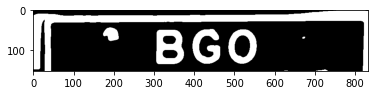

In [111]:
post_process(cv2.imread('./predicted.jpg'))